In [55]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
with open("AuxiliaryData/Asteroid_Updated_Normalized_Array.bin", "rb") as file_descriptor:
    data_array = np.load(file_descriptor)

with open("AuxiliaryData/Asteroid_Updated_Normalized_Header.bin", "rb") as file_descriptor:
    data_header = np.load(file_descriptor)

In [41]:
diameter_index = np.where(data_header == "diameter")[0][0]

target = data_array[:, diameter_index]
features = np.delete(data_array, diameter_index, axis=1)

labels = np.delete(data_header, diameter_index)

In [29]:
best_features = SelectKBest(score_func=mutual_info_regression, k=64)
best_features_fit = best_features.fit(features, target)

print(best_features_fit.scores_)

[2.51141915e-01 3.43942390e-02 2.68884123e-02 7.26618072e-04
 0.00000000e+00 2.55748146e-01 1.80475279e-01 2.49247872e-01
 2.01448684e-01 2.03190873e-01 7.43083214e-01 1.47830061e+00
 4.48772584e-02 0.00000000e+00 2.27676884e-02 2.37396756e-02
 4.36723111e-03 2.58850399e-01 2.49343710e-01 2.49247957e-01
 1.41610718e-02 2.21309881e-02 2.21141027e-02 7.34118176e-03
 7.78436740e-03 0.00000000e+00 2.26250524e-03 4.39999843e-03
 0.00000000e+00 2.19850029e-04 0.00000000e+00 0.00000000e+00
 3.78071932e-03 0.00000000e+00 1.17129479e-03 1.83000363e-03
 1.09789866e-03 0.00000000e+00 7.93108826e-04 0.00000000e+00
 1.79480486e-02 4.04419696e-04 0.00000000e+00 1.88871757e-03
 6.63478966e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.07162555e-03 1.04607833e-03 0.00000000e+00 3.98414192e-03
 2.62302344e-03 2.49005585e-03 0.00000000e+00 0.00000000e+00
 1.46961540e-03 3.29912767e-04 7.51058862e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.958505

In [26]:
model = ExtraTreesRegressor()
model.fit(features, target)

print(model.feature_importances_)

[4.20516276e-03 2.20960539e-03 1.56700552e-03 1.41038066e-03
 1.81870683e-03 2.90471895e-02 2.15828786e-03 3.87285546e-03
 5.91511322e-02 2.60085807e-02 4.50765774e-01 5.12875574e-02
 1.63712223e-03 4.10458665e-02 2.39925660e-03 1.30533319e-03
 1.03966306e-03 3.07489777e-02 6.30226771e-03 4.23336556e-03
 1.55555790e-03 9.41783321e-05 8.45413683e-05 5.45763807e-07
 1.63292014e-06 1.71267817e-05 2.01522538e-04 2.26654160e-03
 5.90993695e-10 7.15431430e-05 2.19182808e-05 5.06871562e-05
 6.28428394e-04 3.17270712e-04 7.43184170e-05 6.13452837e-05
 1.34488885e-05 2.37335025e-08 3.09992592e-08 5.74463425e-06
 3.64773829e-03 1.65737977e-09 4.01250563e-09 9.46402819e-06
 3.75740510e-05 2.44276863e-05 8.19796411e-06 3.22748385e-06
 4.15687536e-05 1.96820722e-07 3.74338702e-04 3.34938435e-04
 4.31102777e-07 2.50628754e-04 7.02247677e-05 1.45955387e-04
 1.24752314e-05 1.41265207e-07 5.65429414e-08 3.17459764e-04
 1.43650279e-07 2.14211415e-06 2.73458382e-07 1.38786247e-06
 1.05120330e-07 1.467467

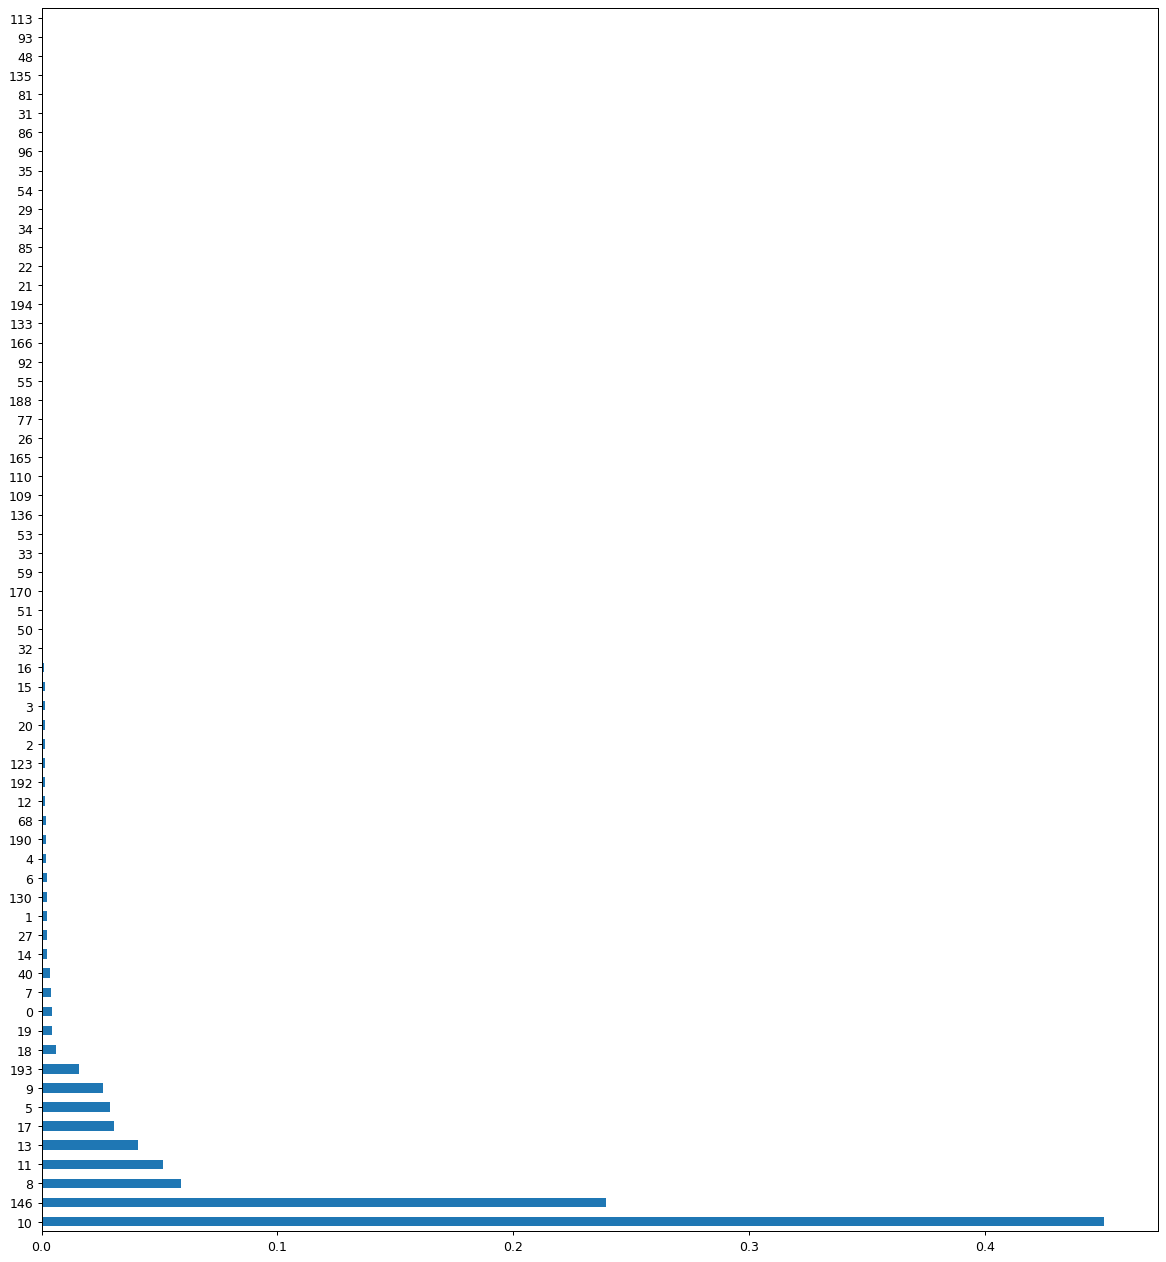

In [48]:
figure(figsize=(16, 18), dpi=90)

feature_importance = pd.Series(model.feature_importances_, index=list(range(features.shape[1])))
most_important_features = feature_importance.nlargest(64)
most_important_features.plot(kind="barh")
plt.savefig("Plots/tree_regressor_feature_importance.png")

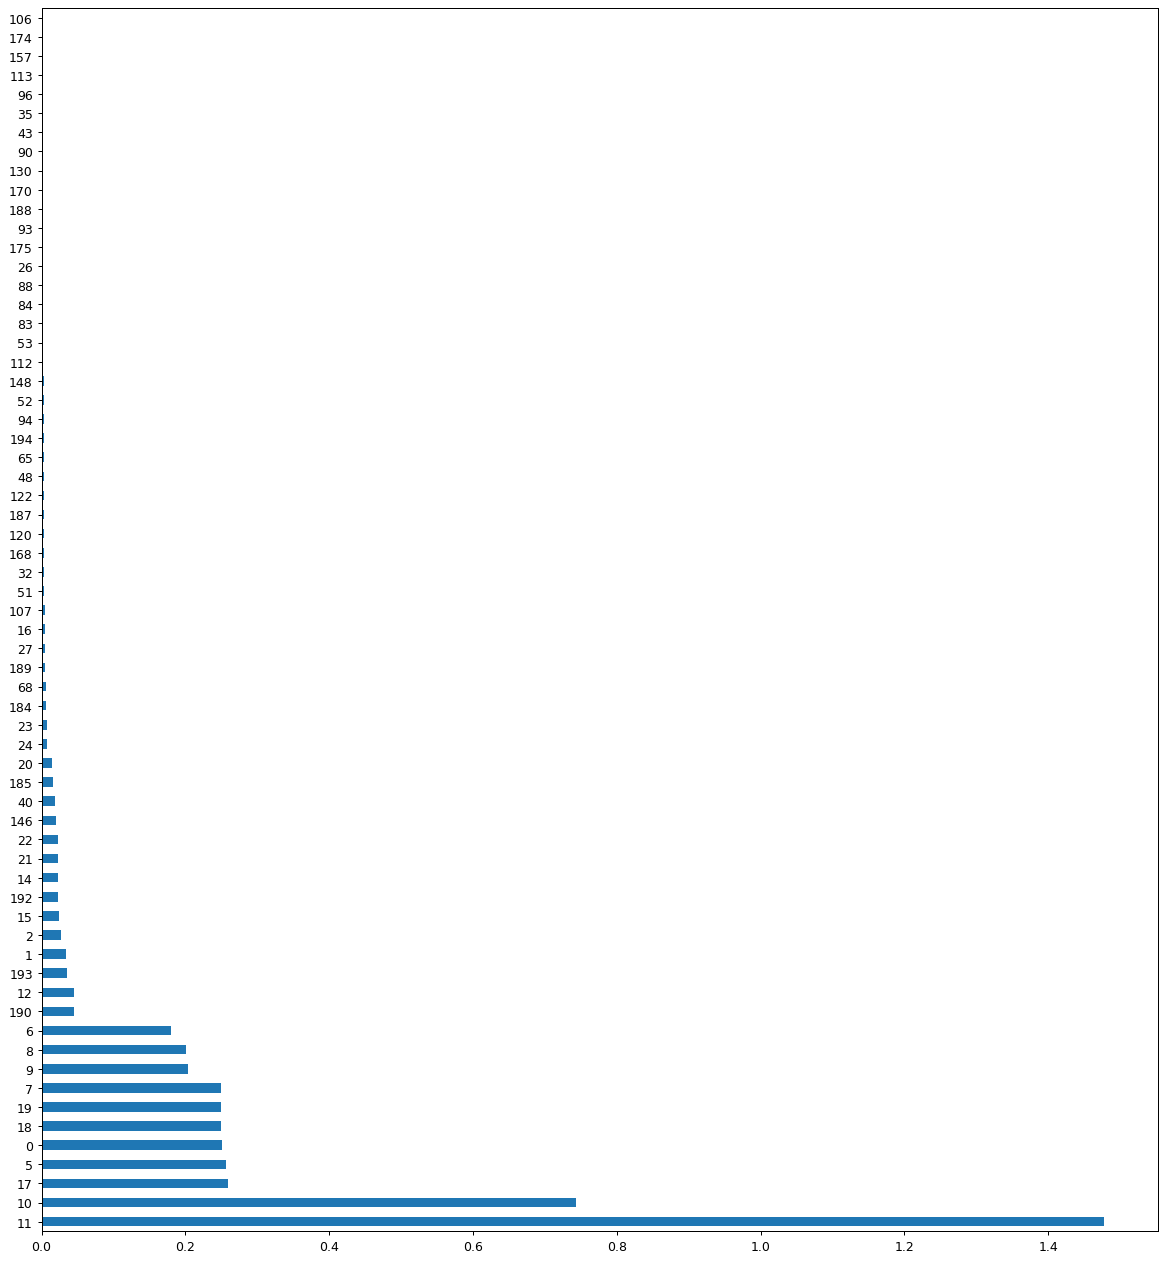

In [49]:
figure(figsize=(16, 18), dpi=90)

feature_highest_mutual_info = pd.Series(best_features_fit.scores_, index=list(range(features.shape[1])))
highest_mutual_info_features = feature_highest_mutual_info.nlargest(64)
highest_mutual_info_features.plot(kind="barh")
plt.savefig("Plots/highest_mutual_info.png")

In [51]:
list_of_selected_features = list(set(most_important_features.index.to_list()).union(set(highest_mutual_info_features.index.to_list())))
print(list_of_selected_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 31, 32, 33, 34, 35, 40, 43, 48, 50, 51, 52, 53, 54, 55, 59, 65, 68, 77, 81, 83, 84, 85, 86, 88, 90, 92, 93, 94, 96, 106, 107, 109, 110, 112, 113, 120, 122, 123, 130, 133, 135, 136, 146, 148, 157, 165, 166, 168, 170, 174, 175, 184, 185, 187, 188, 189, 190, 192, 193, 194]


In [61]:
selected_features = features[:, list_of_selected_features]
selected_labels = labels[list_of_selected_features]

In [58]:
#dump binary numpy arrays for selected features and targets

with open("../Data/Engineered/Asteroid_Updated_Engineered.bin", "wb") as file_descriptor:
    pickle.dump((selected_features, target), file_descriptor)

In [75]:
#dump engineered data to csv

complete_data = np.copy(selected_features)
complete_data = np.hstack((complete_data, target.reshape(-1, 1)))
header = np.hstack((selected_labels, "diameter"))

completed_dataframe = pd.DataFrame(complete_data, columns=header)

completed_dataframe.to_csv("../Data/Engineered/Asteroid_Updated_Engineered.csv")